In [61]:
# pip install holidays

In [62]:
import pandas as pd
import holidays
import matplotlib.pyplot as plt
# # Read the .txt file
# input_file = 'household_power_consumption.txt'
# output_file = 'household_power_consumption.csv'

# # Load the data using pandas, specifying the delimiter as ';'
# df = pd.read_csv(input_file, delimiter=';')

# # Save the data to a .csv file
# df.to_csv(output_file, index=False)

# print(f"Data has been successfully converted and saved to {output_file}")

In [63]:
df = pd.read_csv('data/household_power_consumption.csv')
df

/var/folders/4l/37tzg18n5y95_8hdk84rvt0r0000gn/T/ipykernel_50247/1798769696.py:1: DtypeWarning: Columns (2,3,4,5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('data/household_power_consumption.csv')


,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0
...,...,...,...,...,...,...,...,...,...
2075254,26/11/2010,20:58:00,0.946,0.0,240.43,4.0,0.0,0.0,0.0
2075255,26/11/2010,20:59:00,0.944,0.0,240.0,4.0,0.0,0.0,0.0
2075256,26/11/2010,21:00:00,0.938,0.0,239.82,3.8,0.0,0.0,0.0
2075257,26/11/2010,21:01:00,0.934,0.0,239.7,3.8,0.0,0.0,0.0


In [64]:
df.replace("?", pd.NA, inplace=True)
df.dropna(inplace=True)
df.reset_index(drop=True, inplace=True)

In [65]:
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')
df['Time'] = pd.to_datetime(df['Time'], format='%H:%M:%S').dt.time
numeric_columns = ['Global_active_power', 'Global_reactive_power', 'Voltage', 
                   'Global_intensity', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']
df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric)

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2049280 entries, 0 to 2049279
Data columns (total 9 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   Date                   datetime64[ns]
 1   Time                   object        
 2   Global_active_power    float64       
 3   Global_reactive_power  float64       
 4   Voltage                float64       
 5   Global_intensity       float64       
 6   Sub_metering_1         float64       
 7   Sub_metering_2         float64       
 8   Sub_metering_3         float64       
dtypes: datetime64[ns](1), float64(7), object(1)
memory usage: 140.7+ MB


In [67]:
df
#df.to_csv('cleaned_data_4yrs.csv',index=False)

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,2006-12-16,17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
1,2006-12-16,17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2,2006-12-16,17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
3,2006-12-16,17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
4,2006-12-16,17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0
...,...,...,...,...,...,...,...,...,...
2049275,2010-11-26,20:58:00,0.946,0.000,240.43,4.0,0.0,0.0,0.0
2049276,2010-11-26,20:59:00,0.944,0.000,240.00,4.0,0.0,0.0,0.0
2049277,2010-11-26,21:00:00,0.938,0.000,239.82,3.8,0.0,0.0,0.0
2049278,2010-11-26,21:01:00,0.934,0.000,239.70,3.8,0.0,0.0,0.0


# EDA

In [68]:
daily_sum = df.groupby('Date')['Global_active_power'].sum().reset_index()
daily_sum

,Date,Global_active_power
0,2006-12-16,1209.176
1,2006-12-17,3390.460
2,2006-12-18,2203.826
3,2006-12-19,1666.194
4,2006-12-20,2225.748
...,...,...
1428,2010-11-22,2041.536
1429,2010-11-23,1577.536
1430,2010-11-24,1796.248
1431,2010-11-25,1431.164


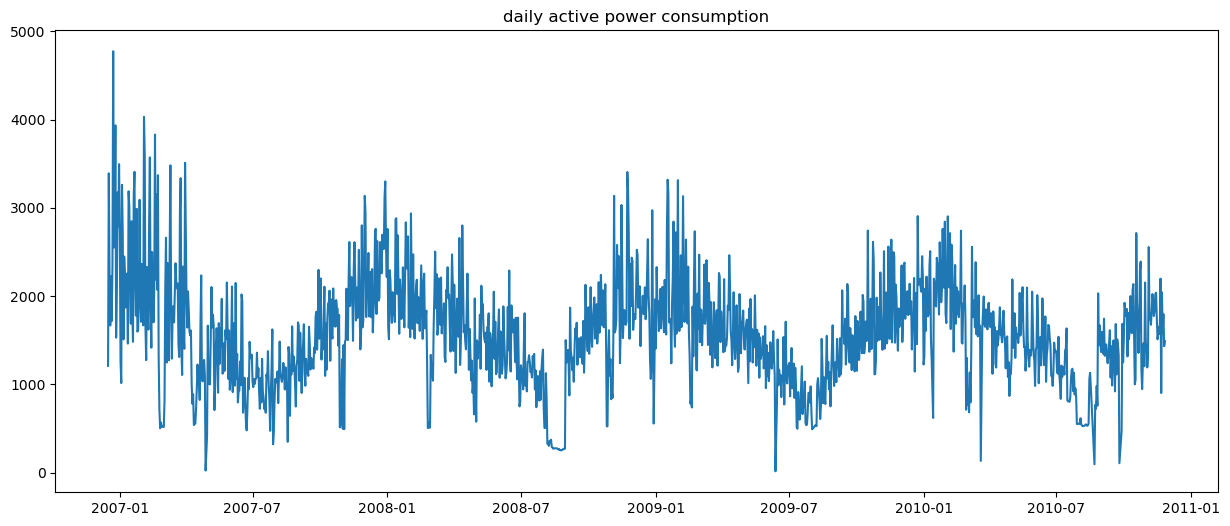

In [69]:
plt.figure(figsize=(15, 6))
plt.plot(daily_sum['Date'], daily_sum['Global_active_power'])
plt.title('daily active power consumption')
plt.show()


In [70]:
df['Hour'] = pd.to_datetime(df['Time'], format='%H:%M:%S').dt.hour
hourly_consumption = df.groupby(['Date', 'Hour'])['Global_active_power'].sum().reset_index()
average_hourly_consumption = hourly_consumption.groupby('Hour')['Global_active_power'].mean().reset_index()
average_hourly_consumption

,Hour,Global_active_power
0,0,39.534143
1,1,32.359510
2,2,28.836896
3,3,26.688230
4,4,26.629899
5,5,27.220412
6,6,47.495422
7,7,90.096748
8,8,87.635304
9,9,79.894975


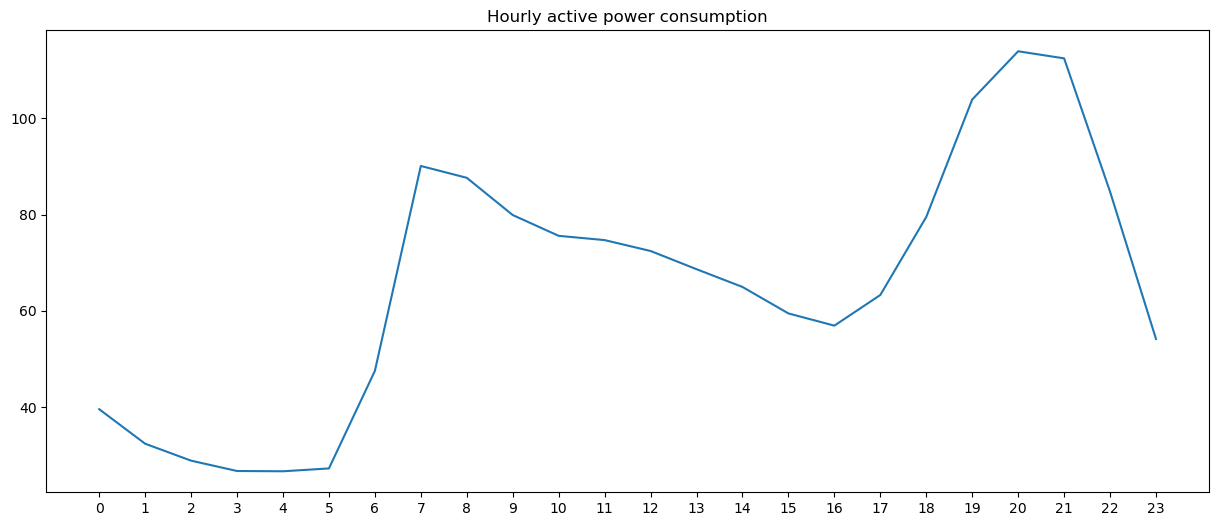

In [71]:
plt.figure(figsize=(15, 6))
plt.plot(average_hourly_consumption['Hour'], average_hourly_consumption['Global_active_power'])
plt.title('Hourly active power consumption')
plt.xticks(average_hourly_consumption['Hour'])
plt.show()

Night: 21-5  
Morning: 5-7  
Afternoon: 7-16  
Evening: 16-21

# Add features


In [72]:
df['is_weekend'] = df['Date'].dt.dayofweek.isin([5,6]).astype(int)

us_holidays = holidays.US()
df['is_holiday'] = df['Date'].apply(lambda x: 1 if x.date() in us_holidays else 0)

df


,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Hour,is_weekend,is_holiday
0,2006-12-16,17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0,17,1,0
1,2006-12-16,17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0,17,1,0
2,2006-12-16,17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0,17,1,0
3,2006-12-16,17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0,17,1,0
4,2006-12-16,17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0,17,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
2049275,2010-11-26,20:58:00,0.946,0.000,240.43,4.0,0.0,0.0,0.0,20,0,0
2049276,2010-11-26,20:59:00,0.944,0.000,240.00,4.0,0.0,0.0,0.0,20,0,0
2049277,2010-11-26,21:00:00,0.938,0.000,239.82,3.8,0.0,0.0,0.0,21,0,0
2049278,2010-11-26,21:01:00,0.934,0.000,239.70,3.8,0.0,0.0,0.0,21,0,0


## Active Power: 
- is the actual power which is really transferred to the load such as transformer, induction motors, generators etc and dissipated in the circuit.
- this is what we will use majorly, the actual consumed power

## Reactive Power:
- The powers that continuously bounce back and forth between source and load is known as reactive Power (Q). Power merely absorbed and returned in load due to its reactive properties is referred to as reactive power.

## Voltage:
- also known as potential difference, electric pressure, or electric tension is the difference in electric potential between two points.

## Intensity:
- power transferred per unit area, where the area is measured on the plane perpendicular to the direction of propagation of the energy.

## Metering & Sub metering:
- Metering refers to the process of measuring and billing utility consumption by a centralized entity, typically a utility company. A single meter is used to measure all units within a building or property.
- Submetering involves the use of individual meters to measure utility usage for each individual unit within a building or property. <-- We'll use this as well


In [75]:
df_2yrs = df[(df['Date'].dt.year == 2006) | (df['Date'].dt.year == 2007)]
df_2yrs.to_csv('data/2yrs_data.csv', index=False)